In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from google.colab import files

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# Subir base de datos de forma local
uploaded = files.upload()
datos = pd.read_excel(next(iter(uploaded)))
datos.head()

Saving Datos_SI_Normalizado.xlsx to Datos_SI_Normalizado (1).xlsx


,MONTO_PIA,MONTO_PIM,MONTO_CERTIFICADO,MONTO_COMPROMETIDO_ANUAL,MONTO_COMPROMETIDO,MONTO_DEVENGADO,MONTO_GIRADO
0,0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
1,0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
2,0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
3,0,0.000014,0.272117,0.245611,0.004004,0.006408,0.5
4,0,0.000004,0.272117,0.245611,0.004004,0.006408,0.5


In [ ]:
#Asignamos las columnas a implemnetar
features = ['MONTO_PIM', 'MONTO_CERTIFICADO', 'MONTO_COMPROMETIDO_ANUAL', 'MONTO_COMPROMETIDO', 'MONTO_DEVENGADO', 'MONTO_GIRADO']
#Ingresamos las columnas a una nueva variable donde se almacenara con sus registros
datos = datos[features]
#Mostramos algunos de los registros
datos.head()

,MONTO_PIM,MONTO_CERTIFICADO,MONTO_COMPROMETIDO_ANUAL,MONTO_COMPROMETIDO,MONTO_DEVENGADO,MONTO_GIRADO
0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
1,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
2,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
3,0.000014,0.272117,0.245611,0.004004,0.006408,0.5
4,0.000004,0.272117,0.245611,0.004004,0.006408,0.5


In [ ]:
#Creamos una nueva variable donde agarramos solo 2 columnas para el analisis
x = datos[['MONTO_CERTIFICADO','MONTO_GIRADO']].head(1500)
x

,MONTO_CERTIFICADO,MONTO_GIRADO
0,0.272117,0.5
1,0.272117,0.5
2,0.272117,0.5
3,0.272117,0.5
4,0.272117,0.5
...,...,...
1495,0.272117,0.5
1496,0.272117,0.5
1497,0.272117,0.5
1498,0.272117,0.5


In [ ]:
#Implementamos el método de Clustering Aglomerativo
modelo_hclust_complete = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=x)
modelo_hclust_average = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=x)

modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=x)

AgglomerativeClustering(distance_threshold=0, metric='euclidean',
                        n_clusters=None)

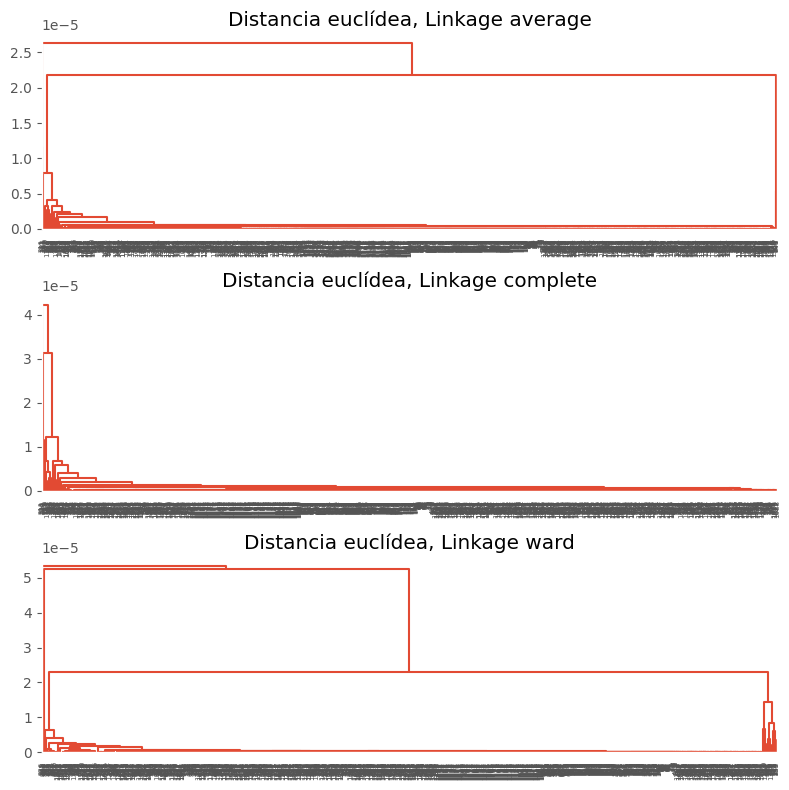

In [ ]:
#Mostramos el Dendrograma
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

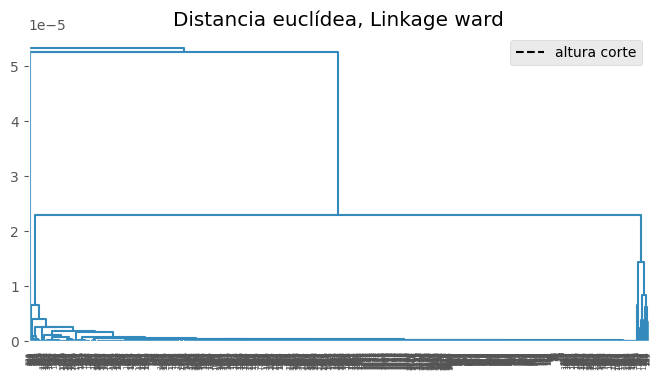

In [ ]:
#Dibujamos una linea sobre el dendrograma para ir analizando los clusters optimos
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 0.04
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

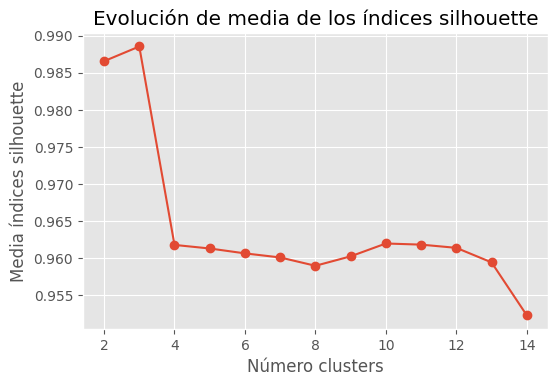

In [ ]:
#Indideces de Soulette
#Asignamos un rango de clusters para analizar
range_n_clusters = range(2, 15)
#Creamos una lista para guardar los indices de silhouette
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    #Creamos el modelo
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    #Aplicamos el modelo a los datos
    cluster_labels = modelo.fit_predict(x)
    #Calculamos el indice de silhouette
    silhouette_avg = silhouette_score(x, cluster_labels)
    #Agregamos el indice a la lista
    valores_medios_silhouette.append(silhouette_avg)

#Mostramos la grafica
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [ ]:
#Enseñamos al modelo con el cluster optimo
modelo_hclust_ward_cl = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 2,
                     )
modelo_hclust_ward_cl.fit(X=x)

AgglomerativeClustering(metric='euclidean')

In [ ]:
label = modelo_hclust_ward_cl.labels_
label

array([0, 0, 0, ..., 0, 0, 0])